LOGISTIC REGRESSION WITH SIGMOID FUNCTION

Data:
Study Hours: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Pass/Fail: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

SIGMOID FUNCTION VALUES
sigmoid(-10) = 0.000045
sigmoid( -5) = 0.006693
sigmoid( -1) = 0.268941
sigmoid(  0) = 0.500000
sigmoid(  1) = 0.731059
sigmoid(  5) = 0.993307
sigmoid( 10) = 0.999955

SKLEARN LOGISTIC REGRESSION

Parameters from sklearn:
Weight (w): 1.1819
Bias (b): -5.3117

Predictions:
Hours:  1, Actual: 0, Predicted Prob: 0.0158, Predicted Class: 0
Hours:  2, Actual: 0, Predicted Prob: 0.0498, Predicted Class: 0
Hours:  3, Actual: 0, Predicted Prob: 0.1461, Predicted Class: 0
Hours:  4, Actual: 0, Predicted Prob: 0.3580, Predicted Class: 0
Hours:  5, Actual: 1, Predicted Prob: 0.6452, Predicted Class: 1
Hours:  6, Actual: 1, Predicted Prob: 0.8557, Predicted Class: 1
Hours:  7, Actual: 1, Predicted Prob: 0.9508, Predicted Class: 1
Hours:  8, Actual: 1, Predicted Prob: 0.9844, Predicted Class: 1
Hours:  9, Actual: 1, Predicted Prob: 0.9952,

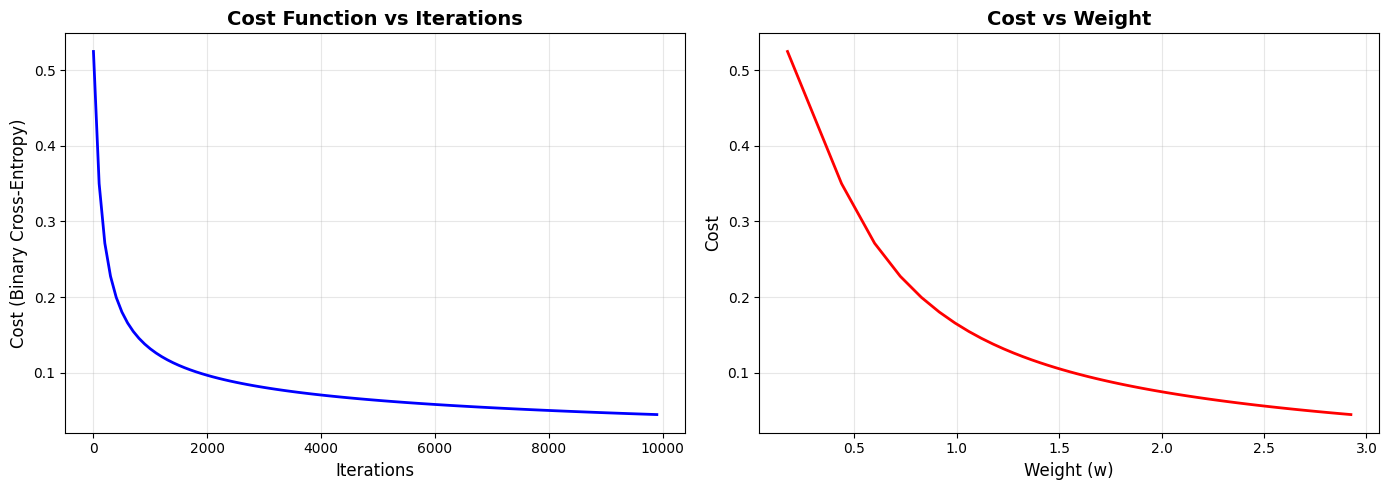

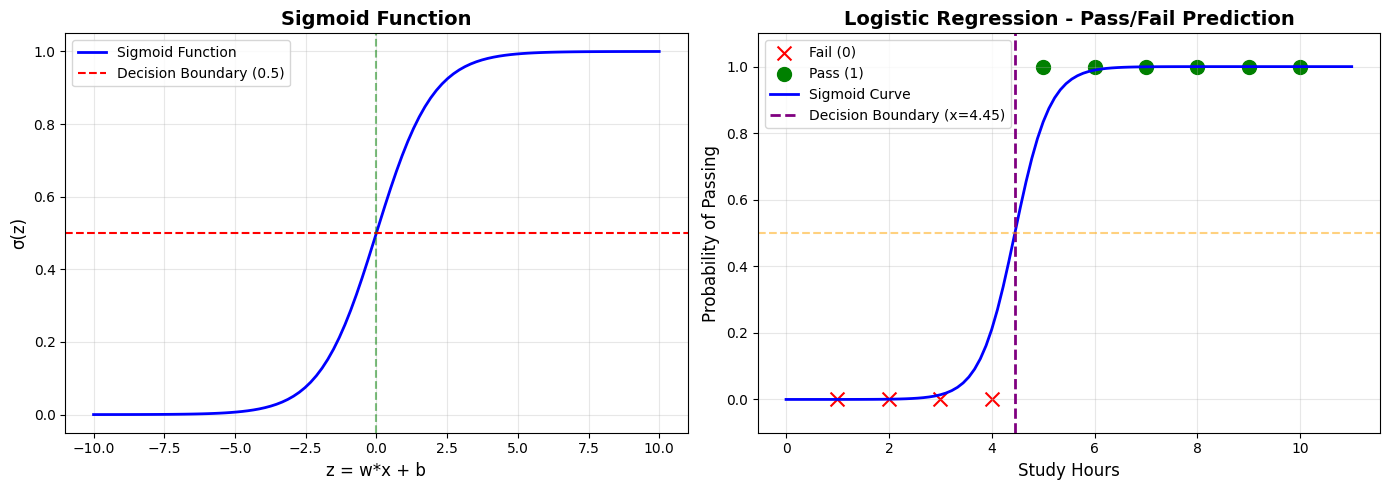


COMPARISON: SKLEARN vs GRADIENT DESCENT

Sklearn:
  Weight (w): 1.1819
  Bias (b): -5.3117
  Accuracy: 100.00%

Gradient Descent:
  Weight (w): 2.9345
  Bias (b): -13.0586
  Accuracy: 100.00%

PROGRAM COMPLETE


In [1]:
# Sigmoid Function and Logistic Regression Implementation
import math
import copy
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Sample data: Study hours vs Pass/Fail
study_hours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Independent variable (X)
pass_fail = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]     # Dependent variable (Y) - Binary

print("=" * 60)
print("LOGISTIC REGRESSION WITH SIGMOID FUNCTION")
print("=" * 60)

# Convert to numpy arrays
X = np.array(study_hours).reshape(-1, 1)
Y = np.array(pass_fail)

print(f"\nData:")
print(f"Study Hours: {study_hours}")
print(f"Pass/Fail: {pass_fail}")

# ============================================================
# PART 1: SIGMOID FUNCTION
# ============================================================

def sigmoid(z):
    """
    Sigmoid function: g(z) = 1 / (1 + e^(-z))
    Maps any value to range [0, 1]
    """
    return 1 / (1 + np.exp(-z))

# Test sigmoid function
print("\n" + "=" * 60)
print("SIGMOID FUNCTION VALUES")
print("=" * 60)
test_values = [-10, -5, -1, 0, 1, 5, 10]
for val in test_values:
    print(f"sigmoid({val:3d}) = {sigmoid(val):.6f}")

# ============================================================
# PART 2: SKLEARN LOGISTIC REGRESSION
# ============================================================

print("\n" + "=" * 60)
print("SKLEARN LOGISTIC REGRESSION")
print("=" * 60)

# Create and train model
log_reg_model = LogisticRegression()
log_reg_model.fit(X, Y)

# Get parameters
w_sklearn = log_reg_model.coef_[0][0]
b_sklearn = log_reg_model.intercept_[0]

print(f"\nParameters from sklearn:")
print(f"Weight (w): {w_sklearn:.4f}")
print(f"Bias (b): {b_sklearn:.4f}")

# Make predictions
Y_predicted_prob = log_reg_model.predict_proba(X)[:, 1]
Y_predicted_class = log_reg_model.predict(X)

print(f"\nPredictions:")
for i in range(len(X)):
    print(f"Hours: {study_hours[i]:2d}, "
          f"Actual: {Y[i]}, "
          f"Predicted Prob: {Y_predicted_prob[i]:.4f}, "
          f"Predicted Class: {Y_predicted_class[i]}")

# Calculate accuracy
accuracy = accuracy_score(Y, Y_predicted_class)
print(f"\nAccuracy: {accuracy:.2%}")

# ============================================================
# PART 3: COST FUNCTION (BINARY CROSS-ENTROPY)
# ============================================================

def compute_cost_logistic(X, Y, w, b):
    """
    Cost function for logistic regression (Binary Cross-Entropy)
    
    J(w,b) = -1/m * Σ[y*log(f(x)) + (1-y)*log(1-f(x))]
    
    where f(x) = sigmoid(w*x + b)
    """
    m = len(X)
    cost = 0
    
    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        
        # Avoid log(0) by adding small epsilon
        epsilon = 1e-15
        f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
        
        cost += -Y[i] * np.log(f_wb) - (1 - Y[i]) * np.log(1 - f_wb)
    
    cost = cost / m
    return cost

print("\n" + "=" * 60)
print("COST FUNCTION (BINARY CROSS-ENTROPY)")
print("=" * 60)

cost_sklearn = compute_cost_logistic(X.flatten(), Y, w_sklearn, b_sklearn)
print(f"Cost with sklearn parameters: {cost_sklearn:.6f}")

# ============================================================
# PART 4: GRADIENT CALCULATION
# ============================================================

def compute_gradient_logistic(X, Y, w, b):
    """
    Compute gradients for logistic regression
    
    ∂J/∂w = 1/m * Σ[(f(x) - y) * x]
    ∂J/∂b = 1/m * Σ[f(x) - y]
    
    where f(x) = sigmoid(w*x + b)
    """
    m = len(X)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        
        dj_dw += (f_wb - Y[i]) * X[i]
        dj_db += (f_wb - Y[i])
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

print("\n" + "=" * 60)
print("GRADIENT CALCULATION")
print("=" * 60)

dw, db = compute_gradient_logistic(X.flatten(), Y, w_sklearn, b_sklearn)
print(f"Gradient ∂J/∂w: {dw:.6f}")
print(f"Gradient ∂J/∂b: {db:.6f}")

# ============================================================
# PART 5: GRADIENT DESCENT
# ============================================================

def gradient_descent_logistic(X, Y, w_init, b_init, alpha, num_iterations):
    """
    Perform gradient descent for logistic regression
    
    Parameters:
    - X: input features
    - Y: target labels (0 or 1)
    - w_init: initial weight
    - b_init: initial bias
    - alpha: learning rate
    - num_iterations: number of iterations
    
    Returns:
    - w, b: optimized parameters
    - J_history: cost history
    - w_history: weight history
    """
    w = w_init
    b = b_init
    
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iterations):
        # Compute gradients
        dj_dw, dj_db = compute_gradient_logistic(X, Y, w, b)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save history
        if i % 100 == 0:
            cost = compute_cost_logistic(X, Y, w, b)
            J_history.append(cost)
            w_history.append(w)
            b_history.append(b)
            
            if i % 1000 == 0:
                print(f"Iteration {i:5d}: Cost = {cost:.6f}, w = {w:.4f}, b = {b:.4f}")
    
    return w, b, J_history, w_history, b_history

print("\n" + "=" * 60)
print("GRADIENT DESCENT")
print("=" * 60)

# Initialize parameters
w_init = 0.0
b_init = 0.0
learning_rate = 0.1
num_iterations = 10000

# Run gradient descent
w_final, b_final, J_history, w_history, b_history = gradient_descent_logistic(
    X.flatten(), Y, w_init, b_init, learning_rate, num_iterations
)

print(f"\nFinal parameters:")
print(f"Weight (w): {w_final:.4f}")
print(f"Bias (b): {b_final:.4f}")
print(f"Final Cost: {J_history[-1]:.6f}")

# ============================================================
# PART 6: PREDICTIONS WITH TRAINED MODEL
# ============================================================

print("\n" + "=" * 60)
print("PREDICTIONS WITH GRADIENT DESCENT MODEL")
print("=" * 60)

def predict_logistic(X, w, b):
    """
    Make predictions using logistic regression
    """
    m = len(X)
    predictions_prob = np.zeros(m)
    predictions_class = np.zeros(m)
    
    for i in range(m):
        z = w * X[i] + b
        predictions_prob[i] = sigmoid(z)
        predictions_class[i] = 1 if predictions_prob[i] >= 0.5 else 0
    
    return predictions_prob, predictions_class

Y_pred_prob, Y_pred_class = predict_logistic(X.flatten(), w_final, b_final)

print("\nPredictions:")
for i in range(len(X)):
    print(f"Hours: {study_hours[i]:2d}, "
          f"Actual: {Y[i]}, "
          f"Predicted Prob: {Y_pred_prob[i]:.4f}, "
          f"Predicted Class: {int(Y_pred_class[i])}")

# Calculate accuracy
accuracy_gd = np.mean(Y_pred_class == Y)
print(f"\nAccuracy: {accuracy_gd:.2%}")

# Test on new data
print("\n" + "=" * 60)
print("PREDICTIONS ON NEW DATA")
print("=" * 60)

new_hours = [2.5, 5.5, 8.5]
for hours in new_hours:
    z = w_final * hours + b_final
    prob = sigmoid(z)
    prediction = 1 if prob >= 0.5 else 0
    print(f"Study {hours} hours → Probability: {prob:.4f} → Prediction: {'Pass' if prediction == 1 else 'Fail'}")

# ============================================================
# PART 7: VISUALIZATION - COST HISTORY
# ============================================================

plt.figure(figsize=(14, 5))

# Plot 1: Cost vs Iterations
plt.subplot(1, 2, 1)
plt.plot(range(0, num_iterations, 100), J_history, 'b-', linewidth=2)
plt.title('Cost Function vs Iterations', fontsize=14, fontweight='bold')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost (Binary Cross-Entropy)', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Cost vs Weight
plt.subplot(1, 2, 2)
plt.plot(w_history, J_history, 'r-', linewidth=2)
plt.title('Cost vs Weight', fontsize=14, fontweight='bold')
plt.xlabel('Weight (w)', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# PART 8: VISUALIZATION - SIGMOID FUNCTION AND DECISION BOUNDARY
# ============================================================

plt.figure(figsize=(14, 5))

# Plot 1: Sigmoid Function
plt.subplot(1, 2, 1)
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)
plt.plot(z_values, sigmoid_values, 'b-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.xlabel('z = w*x + b', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Data and Decision Boundary
plt.subplot(1, 2, 2)

# Plot actual data points
plt.scatter(X[Y == 0], Y[Y == 0], color='red', marker='x', s=100, label='Fail (0)')
plt.scatter(X[Y == 1], Y[Y == 1], color='green', marker='o', s=100, label='Pass (1)')

# Plot sigmoid curve
x_range = np.linspace(0, 11, 100)
z = w_final * x_range + b_final
y_sigmoid = sigmoid(z)
plt.plot(x_range, y_sigmoid, 'b-', linewidth=2, label='Sigmoid Curve')

# Plot decision boundary
decision_boundary = -b_final / w_final
plt.axvline(x=decision_boundary, color='purple', linestyle='--', linewidth=2, 
            label=f'Decision Boundary (x={decision_boundary:.2f})')
plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.5)

plt.title('Logistic Regression - Pass/Fail Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Probability of Passing', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# ============================================================
# PART 9: COMPARISON
# ============================================================

print("\n" + "=" * 60)
print("COMPARISON: SKLEARN vs GRADIENT DESCENT")
print("=" * 60)

print(f"\nSklearn:")
print(f"  Weight (w): {w_sklearn:.4f}")
print(f"  Bias (b): {b_sklearn:.4f}")
print(f"  Accuracy: {accuracy:.2%}")

print(f"\nGradient Descent:")
print(f"  Weight (w): {w_final:.4f}")
print(f"  Bias (b): {b_final:.4f}")
print(f"  Accuracy: {accuracy_gd:.2%}")

print("\n" + "=" * 60)
print("PROGRAM COMPLETE")
print("=" * 60)


LOGISTIC REGRESSION WITH SIGMOID FUNCTION

Data:
Study Hours: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Pass/Fail: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

SIGMOID FUNCTION VALUES
sigmoid(-10) = 0.000045
sigmoid( -5) = 0.006693
sigmoid( -1) = 0.268941
sigmoid(  0) = 0.500000
sigmoid(  1) = 0.731059
sigmoid(  5) = 0.993307
sigmoid( 10) = 0.999955

SKLEARN LOGISTIC REGRESSION

Parameters from sklearn:
Weight (w): 1.1819
Bias (b): -5.3117

Predictions:
Hours:  1, Actual: 0, Predicted Prob: 0.0158, Predicted Class: 0
Hours:  2, Actual: 0, Predicted Prob: 0.0498, Predicted Class: 0
Hours:  3, Actual: 0, Predicted Prob: 0.1461, Predicted Class: 0
Hours:  4, Actual: 0, Predicted Prob: 0.3580, Predicted Class: 0
Hours:  5, Actual: 1, Predicted Prob: 0.6452, Predicted Class: 1
Hours:  6, Actual: 1, Predicted Prob: 0.8557, Predicted Class: 1
Hours:  7, Actual: 1, Predicted Prob: 0.9508, Predicted Class: 1
Hours:  8, Actual: 1, Predicted Prob: 0.9844, Predicted Class: 1
Hours:  9, Actual: 1, Predicted Prob: 0.9952,

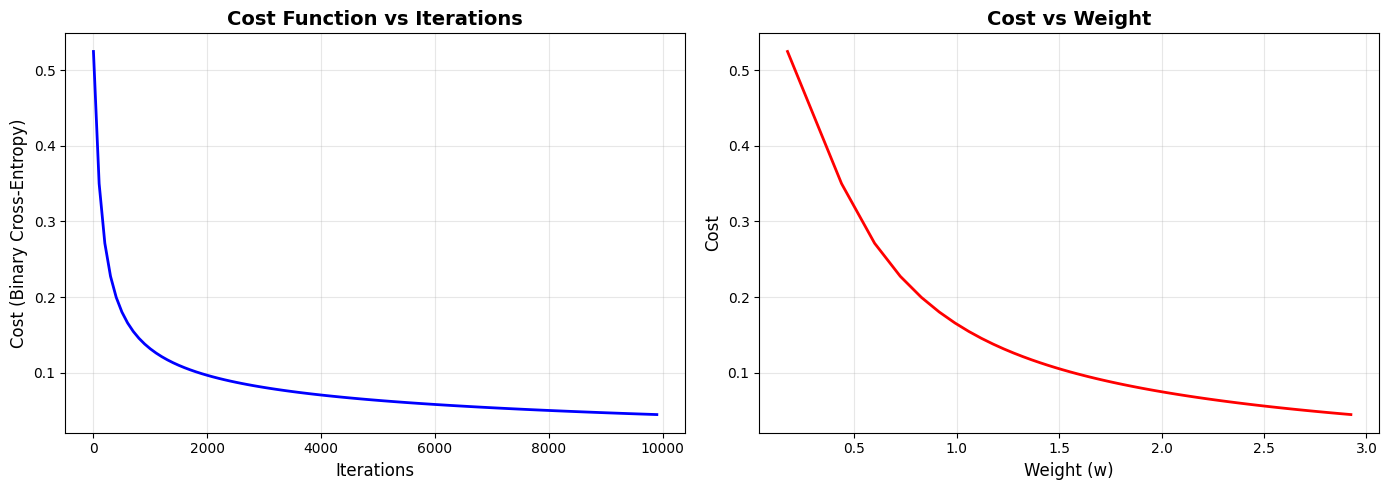

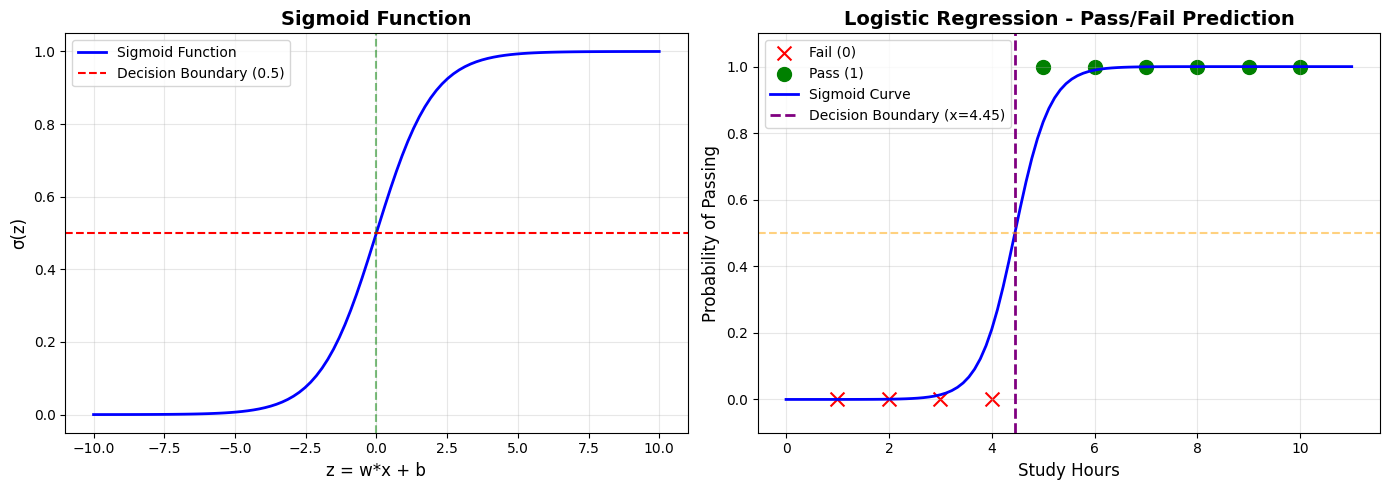


COMPARISON: SKLEARN vs GRADIENT DESCENT

Sklearn:
  Weight (w): 1.1819
  Bias (b): -5.3117
  Accuracy: 100.00%

Gradient Descent:
  Weight (w): 2.9345
  Bias (b): -13.0586
  Accuracy: 100.00%

PROGRAM COMPLETE


In [ ]:
# Sigmoid Function and Logistic Regression Implementation
import math
import copy
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Sample data: Study hours vs Pass/Fail
study_hours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Independent variable (X)
pass_fail = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]     # Dependent variable (Y) - Binary

print("=" * 60)
print("LOGISTIC REGRESSION WITH SIGMOID FUNCTION")
print("=" * 60)

# Convert to numpy arrays
X = np.array(study_hours).reshape(-1, 1)
Y = np.array(pass_fail)

print(f"\nData:")
print(f"Study Hours: {study_hours}")
print(f"Pass/Fail: {pass_fail}")

# ============================================================
# PART 1: SIGMOID FUNCTION
# ============================================================

def sigmoid(z):
    """
    Sigmoid function: g(z) = 1 / (1 + e^(-z))
    Maps any value to range [0, 1]
    """
    return 1 / (1 + np.exp(-z))

# Test sigmoid function
print("\n" + "=" * 60)
print("SIGMOID FUNCTION VALUES")
print("=" * 60)
test_values = [-10, -5, -1, 0, 1, 5, 10]
for val in test_values:
    print(f"sigmoid({val:3d}) = {sigmoid(val):.6f}")

# ============================================================
# PART 2: SKLEARN LOGISTIC REGRESSION
# ============================================================

print("\n" + "=" * 60)
print("SKLEARN LOGISTIC REGRESSION")
print("=" * 60)

# Create and train model
log_reg_model = LogisticRegression()
log_reg_model.fit(X, Y)

# Get parameters
w_sklearn = log_reg_model.coef_[0][0]
b_sklearn = log_reg_model.intercept_[0]

print(f"\nParameters from sklearn:")
print(f"Weight (w): {w_sklearn:.4f}")
print(f"Bias (b): {b_sklearn:.4f}")

# Make predictions
Y_predicted_prob = log_reg_model.predict_proba(X)[:, 1]
Y_predicted_class = log_reg_model.predict(X)

print(f"\nPredictions:")
for i in range(len(X)):
    print(f"Hours: {study_hours[i]:2d}, "
          f"Actual: {Y[i]}, "
          f"Predicted Prob: {Y_predicted_prob[i]:.4f}, "
          f"Predicted Class: {Y_predicted_class[i]}")

# Calculate accuracy
accuracy = accuracy_score(Y, Y_predicted_class)
print(f"\nAccuracy: {accuracy:.2%}")

# ============================================================
# PART 3: COST FUNCTION (BINARY CROSS-ENTROPY)
# ============================================================

def compute_cost_logistic(X, Y, w, b):
    """
    Cost function for logistic regression (Binary Cross-Entropy)
    
    J(w,b) = -1/m * Σ[y*log(f(x)) + (1-y)*log(1-f(x))]
    
    where f(x) = sigmoid(w*x + b)
    """
    m = len(X)
    cost = 0
    
    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        
        # Avoid log(0) by adding small epsilon
        epsilon = 1e-15
        f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
        
        cost += -Y[i] * np.log(f_wb) - (1 - Y[i]) * np.log(1 - f_wb)
    
    cost = cost / m
    return cost

print("\n" + "=" * 60)
print("COST FUNCTION (BINARY CROSS-ENTROPY)")
print("=" * 60)

cost_sklearn = compute_cost_logistic(X.flatten(), Y, w_sklearn, b_sklearn)
print(f"Cost with sklearn parameters: {cost_sklearn:.6f}")

# ============================================================
# PART 4: GRADIENT CALCULATION
# ============================================================

def compute_gradient_logistic(X, Y, w, b):
    """
    Compute gradients for logistic regression
    
    ∂J/∂w = 1/m * Σ[(f(x) - y) * x]
    ∂J/∂b = 1/m * Σ[f(x) - y]
    
    where f(x) = sigmoid(w*x + b)
    """
    m = len(X)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        
        dj_dw += (f_wb - Y[i]) * X[i]
        dj_db += (f_wb - Y[i])
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

print("\n" + "=" * 60)
print("GRADIENT CALCULATION")
print("=" * 60)

dw, db = compute_gradient_logistic(X.flatten(), Y, w_sklearn, b_sklearn)
print(f"Gradient ∂J/∂w: {dw:.6f}")
print(f"Gradient ∂J/∂b: {db:.6f}")

# ============================================================
# PART 5: GRADIENT DESCENT
# ============================================================

def gradient_descent_logistic(X, Y, w_init, b_init, alpha, num_iterations):
    """
    Perform gradient descent for logistic regression
    
    Parameters:
    - X: input features
    - Y: target labels (0 or 1)
    - w_init: initial weight
    - b_init: initial bias
    - alpha: learning rate
    - num_iterations: number of iterations
    
    Returns:
    - w, b: optimized parameters
    - J_history: cost history
    - w_history: weight history
    """
    w = w_init
    b = b_init
    
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iterations):
        # Compute gradients
        dj_dw, dj_db = compute_gradient_logistic(X, Y, w, b)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save history
        if i % 100 == 0:
            cost = compute_cost_logistic(X, Y, w, b)
            J_history.append(cost)
            w_history.append(w)
            b_history.append(b)
            
            if i % 1000 == 0:
                print(f"Iteration {i:5d}: Cost = {cost:.6f}, w = {w:.4f}, b = {b:.4f}")
    
    return w, b, J_history, w_history, b_history

print("\n" + "=" * 60)
print("GRADIENT DESCENT")
print("=" * 60)

# Initialize parameters
w_init = 0.0
b_init = 0.0
learning_rate = 0.1
num_iterations = 10000

# Run gradient descent
w_final, b_final, J_history, w_history, b_history = gradient_descent_logistic(
    X.flatten(), Y, w_init, b_init, learning_rate, num_iterations
)

print(f"\nFinal parameters:")
print(f"Weight (w): {w_final:.4f}")
print(f"Bias (b): {b_final:.4f}")
print(f"Final Cost: {J_history[-1]:.6f}")

# ============================================================
# PART 6: PREDICTIONS WITH TRAINED MODEL
# ============================================================

print("\n" + "=" * 60)
print("PREDICTIONS WITH GRADIENT DESCENT MODEL")
print("=" * 60)

def predict_logistic(X, w, b):
    """
    Make predictions using logistic regression
    """
    m = len(X)
    predictions_prob = np.zeros(m)
    predictions_class = np.zeros(m)
    
    for i in range(m):
        z = w * X[i] + b
        predictions_prob[i] = sigmoid(z)
        predictions_class[i] = 1 if predictions_prob[i] >= 0.5 else 0
    
    return predictions_prob, predictions_class

Y_pred_prob, Y_pred_class = predict_logistic(X.flatten(), w_final, b_final)

print("\nPredictions:")
for i in range(len(X)):
    print(f"Hours: {study_hours[i]:2d}, "
          f"Actual: {Y[i]}, "
          f"Predicted Prob: {Y_pred_prob[i]:.4f}, "
          f"Predicted Class: {int(Y_pred_class[i])}")

# Calculate accuracy
accuracy_gd = np.mean(Y_pred_class == Y)
print(f"\nAccuracy: {accuracy_gd:.2%}")

# Test on new data
print("\n" + "=" * 60)
print("PREDICTIONS ON NEW DATA")
print("=" * 60)

new_hours = [2.5, 5.5, 8.5]
for hours in new_hours:
    z = w_final * hours + b_final
    prob = sigmoid(z)
    prediction = 1 if prob >= 0.5 else 0
    print(f"Study {hours} hours → Probability: {prob:.4f} → Prediction: {'Pass' if prediction == 1 else 'Fail'}")

# ============================================================
# PART 7: VISUALIZATION - COST HISTORY
# ============================================================

plt.figure(figsize=(14, 5))

# Plot 1: Cost vs Iterations
plt.subplot(1, 2, 1)
plt.plot(range(0, num_iterations, 100), J_history, 'b-', linewidth=2)
plt.title('Cost Function vs Iterations', fontsize=14, fontweight='bold')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost (Binary Cross-Entropy)', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Cost vs Weight
plt.subplot(1, 2, 2)
plt.plot(w_history, J_history, 'r-', linewidth=2)
plt.title('Cost vs Weight', fontsize=14, fontweight='bold')
plt.xlabel('Weight (w)', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# PART 8: VISUALIZATION - SIGMOID FUNCTION AND DECISION BOUNDARY
# ============================================================

plt.figure(figsize=(14, 5))

# Plot 1: Sigmoid Function
plt.subplot(1, 2, 1)
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)
plt.plot(z_values, sigmoid_values, 'b-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.xlabel('z = w*x + b', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Data and Decision Boundary
plt.subplot(1, 2, 2)

# Plot actual data points
plt.scatter(X[Y == 0], Y[Y == 0], color='red', marker='x', s=100, label='Fail (0)')
plt.scatter(X[Y == 1], Y[Y == 1], color='green', marker='o', s=100, label='Pass (1)')

# Plot sigmoid curve
x_range = np.linspace(0, 11, 100)
z = w_final * x_range + b_final
y_sigmoid = sigmoid(z)
plt.plot(x_range, y_sigmoid, 'b-', linewidth=2, label='Sigmoid Curve')

# Plot decision boundary
decision_boundary = -b_final / w_final
plt.axvline(x=decision_boundary, color='purple', linestyle='--', linewidth=2, 
            label=f'Decision Boundary (x={decision_boundary:.2f})')
plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.5)

plt.title('Logistic Regression - Pass/Fail Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Probability of Passing', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# ============================================================
# PART 9: COMPARISON
# ============================================================

print("\n" + "=" * 60)
print("COMPARISON: SKLEARN vs GRADIENT DESCENT")
print("=" * 60)

print(f"\nSklearn:")
print(f"  Weight (w): {w_sklearn:.4f}")
print(f"  Bias (b): {b_sklearn:.4f}")
print(f"  Accuracy: {accuracy:.2%}")

print(f"\nGradient Descent:")
print(f"  Weight (w): {w_final:.4f}")
print(f"  Bias (b): {b_final:.4f}")
print(f"  Accuracy: {accuracy_gd:.2%}")

print("\n" + "=" * 60)
print("PROGRAM COMPLETE")
print("=" * 60)
